<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.1.1: K-Means by the algorithm

### Australian athletes data set

##### Description
These data were collected in a study of how data on various characteristics of the bloood varied with sport body size and sex of the athlete.

Usage
data(ais)
Format
A data frame with 202 observations on the following 13 variables.

rcc
red blood cell count, in

wcc
while blood cell count, in per liter

hc
hematocrit, percent

hg
hemaglobin concentration, in g per decaliter

ferr
plasma ferritins, ng

bmi
Body mass index, kg

ssf
sum of skin folds

pcBfat
percent Body fat

lbm
lean body mass, kg

ht
height, cm

wt
weight, kg

sex
a factor with levels f m

sport
a factor with levels B_Ball Field Gym Netball Row Swim T_400m T_Sprnt Tennis W_Polo

Details
Do blood hemoglobin concentrations of athletes in endurance-related events differ from those in power-related events?

Source
These data were the basis for the analyses that are reported in Telford and Cunningham (1991).

References
Telford, R.D. and Cunningham, R.B. 1991. Sex, sport and body-size dependency of hematology in highly trained athletes. Medicine and Science in Sports and Exercise 23: 788-794.

**References**

[Data](http://vincentarelbundock.github.io/Rdatasets/csv/DAAG/ais.csv)

[Data Dictionary](http://vincentarelbundock.github.io/Rdatasets/doc/DAAG/ais.html)

In [15]:
# IMPORT DATA SCIENCE LIBRARIES
import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.spatial.distance import cdist 
from matplotlib import pyplot as plt

# Use the ggplot style - from R 
plt.style.use('ggplot')

%matplotlib inline

# IMPORT SKLEARN FUNCTIONS
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics.cluster import homogeneity_score

In [2]:
metrics.plot_confusion_matrix()

TypeError: plot_confusion_matrix() missing 3 required positional arguments: 'estimator', 'X', and 'y_true'

### 1. Import the data

In [2]:
csv_file = 'ais.csv'
ais_data = pd.read_csv(r"C:\Users\micha\Documents\GitHub\ds-mel-pt-24feb-projects\MichaelPresidente\Data\ais.csv")

### 2. Do some EDA of relationships between features.

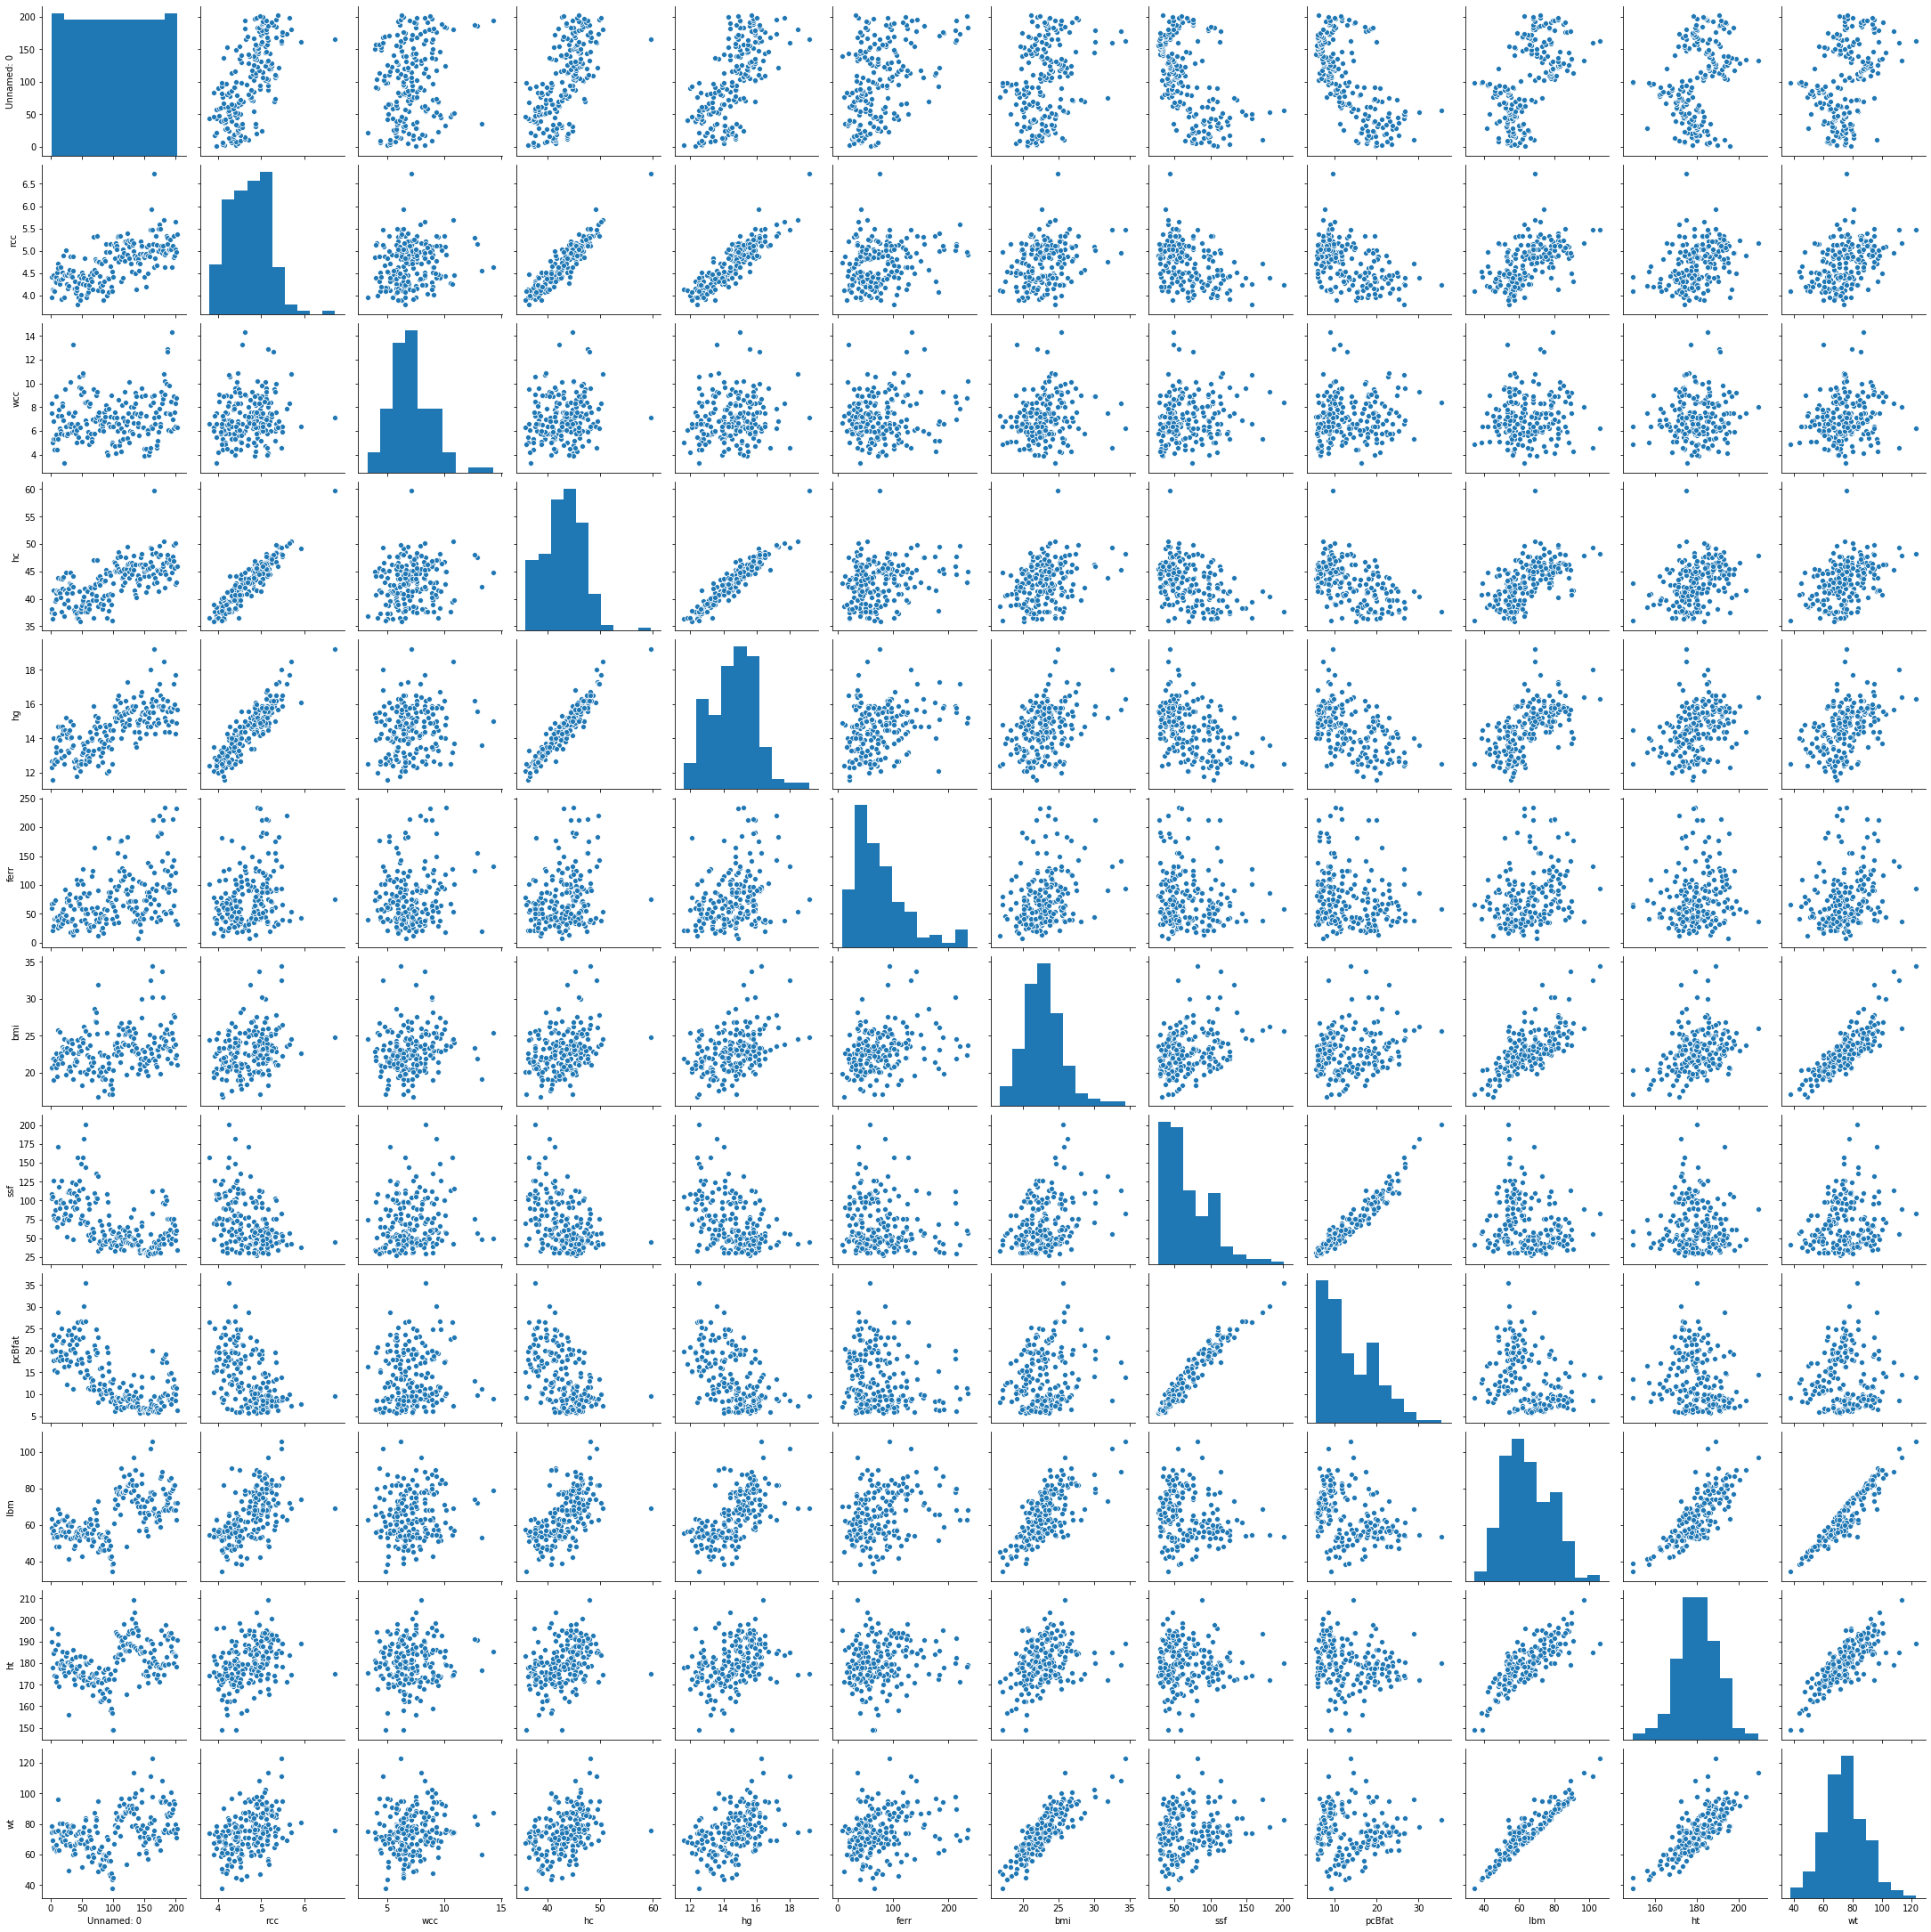

In [3]:
sns.pairplot(data = ais_data)

### 3. Prepare the data for clustering

1. Remove the `sex`, `sport` column. We will see if the clusters from K-Means end up like the actual sex.
2. Put the features on the same scale.

In [3]:
# ANSWER
ais_prep = ais_data.drop(['sex','sport'], axis =1)

In [4]:
# Standardize the data
X_std = StandardScaler().fit_transform(ais_prep)


### 4. Clustering with K-Means

- Cluster the data to our our target groups.
    - Use sklearn.cluster.KMeans
- We know that there are 2 actual classes. Lets try using 2, 4. Run the clustering algorithm with each of those k values.

In [5]:
# ANSWER
km =KMeans()

In [6]:
km.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
centroids = km.cluster_centers_

In [8]:
# Every point in 3 dimensions
print(centroids)

[[-1.20156439 -0.27772164  0.30250598 -0.08812993 -0.19276995 -0.68649215
  -0.30324673  0.39577118  0.69563413 -0.52081118 -0.11637532 -0.30981711]
 [ 0.46703064  0.40798877 -0.16087469  0.45843546  0.4515302   0.22420798
   0.37516187 -0.55098215 -0.7378902   1.20109331  1.2154745   0.96650448]
 [-0.24450642 -0.5461917  -0.28337763 -0.53344478 -0.55940701 -0.28837279
  -1.12366779 -0.52893909 -0.32123912 -1.24677642 -1.385057   -1.44321967]
 [-0.86698875 -0.60500574  0.50546704 -0.76703977 -0.61291934 -0.13925644
   0.95451318  2.04679375  1.86921857 -0.37168335 -0.35741453  0.36698215]
 [ 1.21693561  0.80620814  1.41281688  0.84018304  0.88508303  2.39227778
   0.66166325 -0.23462737 -0.38030617  0.75898649  0.44162556  0.68278739]
 [-1.13037067 -1.231832   -0.60787601 -1.35665619 -1.41637324 -0.39109403
  -0.35547949  0.80172495  0.95562702 -0.67236215 -0.19074828 -0.38410674]
 [ 1.17700868  0.92676843  0.5258842   0.97660166  1.05488179  0.38249088
   1.76912872  0.25155134  0.008

### 5. Get the labels for the models

In [10]:
km.labels_

array([5, 5, 5, 5, 0, 5, 5, 5, 0, 5, 3, 0, 0, 0, 0, 5, 5, 0, 0, 0, 5, 5,
       0, 0, 0, 0, 5, 3, 2, 0, 0, 0, 3, 3, 0, 0, 5, 5, 5, 5, 5, 5, 3, 5,
       3, 3, 5, 5, 3, 2, 3, 3, 3, 0, 3, 3, 5, 5, 2, 2, 5, 5, 0, 0, 2, 2,
       2, 2, 7, 3, 3, 3, 3, 0, 3, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 5, 5, 2, 5, 2, 2, 2, 2, 2, 2, 2, 7, 7, 7, 1, 1, 7, 7, 1, 1, 1,
       7, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 4, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1,
       6, 1, 1, 7, 1, 7, 1, 7, 2, 7, 7, 7, 6, 6, 7, 7, 7, 7, 7, 7, 2, 7,
       2, 7, 7, 7, 1, 6, 7, 4, 6, 4, 1, 7, 7, 7, 7, 7, 7, 7, 7, 4, 7, 6,
       4, 6, 4, 7, 7, 6, 4, 6, 6, 4, 4, 7, 6, 1, 1, 6, 7, 4, 4, 6, 7, 6,
       7, 7, 4, 7])

In [13]:
# ANSWER

### 6. Elbow Method For Optimal k

For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre. As k increases, the sum of squared distance tends to zero. 

In [11]:
# Step 3: Building the clustering model and calculating the values of the Distortion and Inertia

# Adpoted from Elbow Method for optimal value of k in KMeans
# https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,12) 

for k in K: 
	#Building and fitting the model 
	kmeanModel = KMeans(n_clusters=k).fit(X_std) 
	kmeanModel.fit(X_std)	 
	
	distortions.append(sum(np.min(cdist(X_std, kmeanModel.cluster_centers_, 
					'euclidean'),axis=1)) / X_std.shape[0]) 
	inertias.append(kmeanModel.inertia_) 

	mapping1[k] = sum(np.min(cdist(X_std, kmeanModel.cluster_centers_, 
				'euclidean'),axis=1)) / X_std.shape[0] 
	mapping2[k] = kmeanModel.inertia_ 


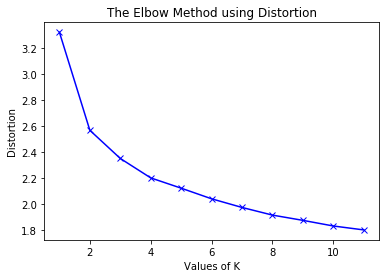

In [12]:
# Answer - Distortion
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

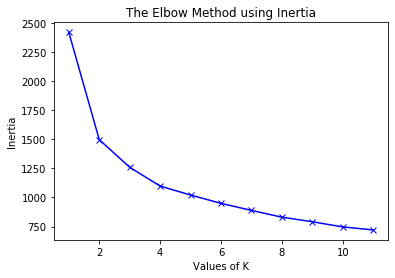

In [13]:
# Answer Inertia
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

### 7. Plot `ht` vs. `wt` using the clusters from each model.

- Plot ht, wt using hue sex
- Plot ht, wt using hue label

Each time, compare to the actual species classification.

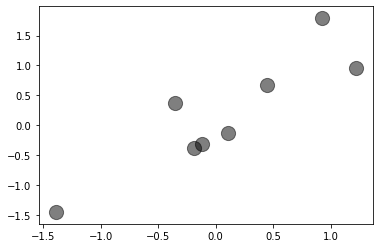

In [14]:
# ANSWER
# plt.scatter(X[:, 11], X[:, 12], c=y_kmeans, s=50, cmap='viridis')

# Plot the possible Centres
centers = km.cluster_centers_
plt.scatter(centers[:, 10], centers[:, 11], c='black', s=200, alpha=0.5);



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



